KeyError: "Unable to open object (Object 'gc_no_dm' doesn't exist)"

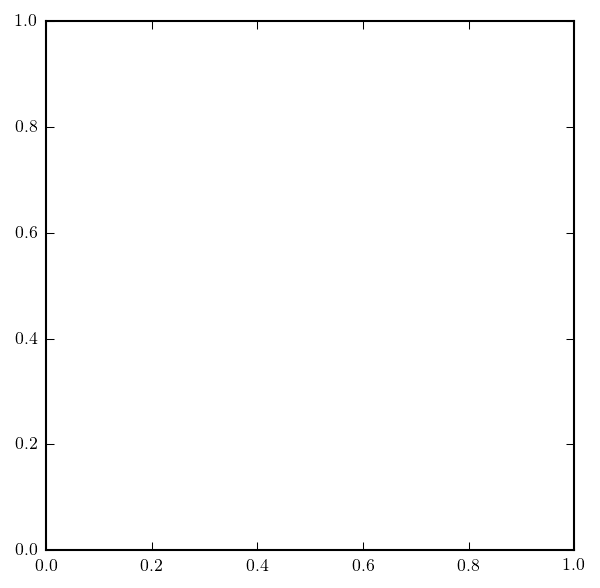

In [3]:
import cPickle as pickle
import h5py


def PlotSpec(keys, ylim, colors, dm=True):
    
    
    models = ['spike_template.hdf5',]
    
    for i, model in enumerate(models):
        
        if i%1==0:
            h = h5py.File(model)
            if dm is True:
                fit = h['/fit_results/GC'].attrs
            else:
                fit = h['/fit_results/GC_no_dm'].attrs
            
            print fit.keys()
            
            for j, key in enumerate(keys):
                lab = None
                if (key=='flux_DM') and (dm==False):
                    continue
                if i == 0:
                    lab = key.replace('flux_',"").replace('_','+')
                if i == 0:
                    plt.errorbar(fit['energies']/1e3, fit['energies']**2*fit[key]/1e3, fit['energies']**2*fit[key.replace('flux','fluxunc')][:,1]/1e3 ,
                                 label=lab,alpha=1, color=colors[j], marker='o', markersize=2, markeredgecolor=None)
                    
                    
                    if dm==True:
                        energy, mean  = np.genfromtxt('calore_fig_12_mean.dat', delimiter=',').T
                        energy, stdev = np.genfromtxt('calore_fig_12_upper.dat', delimiter=',').T
                        stdev -= mean
                        lower, upper, mean = list(mean-stdev), list(mean+stdev), list(mean)
                        plt.step(fit['bins']/1e3, [lower[0],]+lower, color='k', alpha=0.05)
                        plt.step(fit['bins']/1e3, [upper[0],]+upper, color='k', alpha=0.05)
                        plt.step(fit['bins']/1e3, [mean[0],]+mean, color='k', alpha=0.05)

                        prev = fit['bins'][0]/1e3
                        for k, end in enumerate(fit['bins'][1:]/1e3):    
                            plt.fill_between([prev,end], [lower[k],lower[k]] , [upper[k],upper[k]], alpha=0.01, color='gold', edgecolor=(0,0,0,0))
                            prev=end
                        
                    
                else:
                    plt.loglog(fit['energies']/1e3, fit['energies']**2*fit[key]/1e3,label=lab,alpha=1, c=colors[j])
            
    if dm == True:
        plt.fill_between([.35,.43],[.05,.05],[.1,.1], alpha=.1, color='gold', edgecolor=(0,0,0,0), transform=plt.gca().transAxes)
        plt.text(.45,.075,'Corr. Sys. Calore et al (2015)', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)
        
    
    plt.legend(frameon=False, fontsize=10, ncol=1)        
            
    plt.ylim(ylim)
    plt.xlim(3e-1,2.5e2)
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2, height_ratios=[1.25,1])

plt.figure(figsize=(10,9))

components = ['flux_DM', 'flux_Bubbles', 'flux_Isotropic',u'flux_Pi0_Brems', u'flux_ICS', 'flux_Pi0_Spike','flux_ICS_Spike']
colors = ['steelblue','goldenrod','firebrick', 'darkseagreen','violet','red', 'blue']


plt.subplot(gs[0,0])
PlotSpec(keys=components, ylim=(5e-8,1e-5), colors=colors, dm=False)

linthresh = 1e-7

plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10), linscaley=0.1)
plt.xscale('log')
#plt.grid(axis='y', which='both')
plt.ylim(-1e-6,1e-5)
plt.fill_between((.01,1e3), (-linthresh, -linthresh), (linthresh,linthresh), color='b', alpha=.04 )
plt.hlines((-linthresh,0, linthresh),1e-3,1e5, alpha=.5, color='k')

#plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/spectral_plots_semilogy_P8.pdf', bbox_inches='tight')

In [2]:
import h5py

h5 = h5py.File('./spike_template.hdf5')
for f in h5['fit_results']:
    print f
    
h5.close()

GC
